In [1]:
## Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

## Data Preparation 

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01[:,0])
print(dist_01[:,1])
print(dist_01.shape)
print(dist_02.shape)

[ 1.61595957  0.80912396  2.4226375   1.21240055  0.43529751 -0.31255521
  2.07163883  1.98944267  0.90189823  1.02148025  1.39296248  2.04865186
  2.17068063  0.87689112  0.98234704  1.38170703  0.81440047 -0.29563445
  2.32129439  1.36860563  1.57858121  1.09354477  1.94675108  0.75672621
 -0.29707666  0.57083421  0.72398388  0.21763048  2.31788782  1.09612407
  2.5007739   1.90833411  2.10033203  0.90106842  1.88331947  0.78904952
  0.20678982  0.45687741 -0.06585653  0.92114772  0.69845243  0.23155223
  2.49928803  0.08905517  1.7159935   0.30342365  0.69240883  0.21307503
  0.86981189 -0.03213007  0.64805208 -0.71024127  0.88496418  5.3630513
  1.12268088  1.40976568  1.99256937  1.96453752  0.53551255  2.04193107
 -0.68505896  1.69083934  0.38926859  2.17022584  1.11650445  1.38689322
 -0.27713596  1.34627296 -0.27306719 -0.21145124  0.29009883  0.29344349
  1.16044817  0.76488293  3.32498577  0.2524747   2.03543066  0.70627802
 -0.14245037  0.63436114  0.76186088  0.04953793  2.

## Plotting data

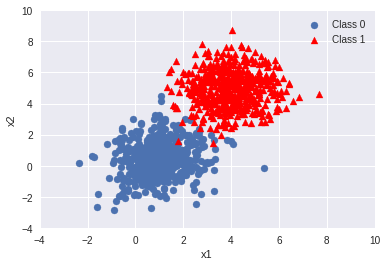

In [4]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Splitting Data in Training and Testing Data Set 

In [5]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 3.99737818  6.99451622  1.        ]
 [ 0.5196265  -0.34328403  0.        ]
 [ 3.50914749  6.27238952  1.        ]
 [ 3.58517325  7.07571601  1.        ]
 [ 2.6233613  -0.51136608  0.        ]
 [ 3.62382625  2.64961109  1.        ]
 [ 5.42829827  3.91375805  1.        ]
 [ 1.67566685  1.34227903  0.        ]
 [ 5.938094    4.31496477  1.        ]
 [ 4.29603401  4.10377718  1.        ]]


In [8]:
split = int(0.8*data.shape[0])

In [9]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Functions

In [10]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [11]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [12]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [1]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [14]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [15]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [16]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [17]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [18]:
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

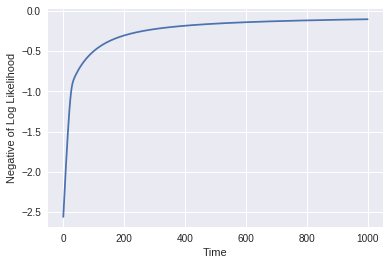

In [19]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

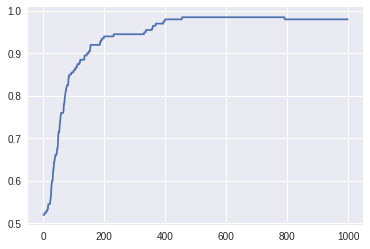

0.98


In [20]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Plotting a Hyperplane or a decision boundary 

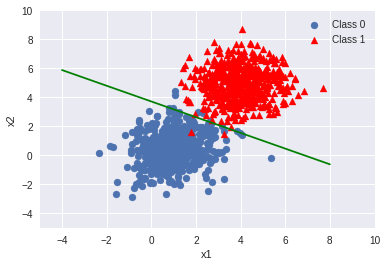

In [21]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='g')

plt.legend()
plt.show()

In [22]:
print(W)
print(b)

[0.62240904 1.31052634]
-4.714277646778357
